In [245]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats.stats import pearsonr
from collections import Counter

In [292]:
gp_table = pd.read_table('./crab_gp_kaz_10_2010-2019_calib_dina.csv', sep='\t')

fl = np.genfromtxt('total_profile.txt')

In [293]:
gp_table['zeros_ends'] = None
gp_table['pears'] = None

In [294]:
for idx, value in enumerate(gp_table['fName']):
    
    profile = np.genfromtxt(value, skip_header=6)

    try:
        p0 = pearsonr(profile, pat_profile)[0]
    except ValueError:
        gp_table['pears'][idx] = 0.1
    gp_table['pears'][idx] = p0
    
    start = profile[:10]
    end = profile[-10:]
    if  min(start) == max(start) == 0. or min(end) == max(end) == 0.:
        gp_table['zeros_ends'][idx] = 1
    else:
        gp_table['zeros_ends'][idx] = 0

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

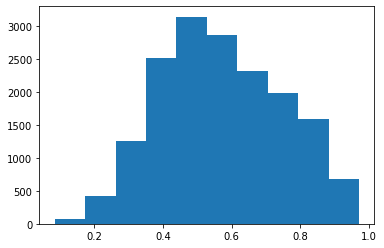

In [277]:
plt.close()
plt.hist(gp_table['pears'])
plt.show()

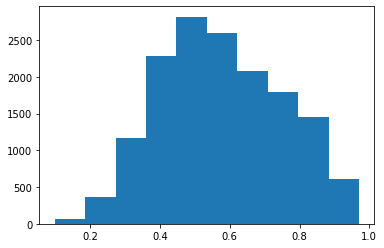

In [264]:
plt.close()
plt.hist(pear)
plt.show()

In [301]:
gp_table

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, Jy","STD, Jy",path obs data,"Count of GP, u","point of gp, point","amp of gp, Jy","W50, point","W10, point",path plot,fName,zeros_ends,pears
0,13.02.2010,20:26:28.9413394,2.4576,5.988346,2430,34,1719.973935,7.172373,./final_dataset/\obs_data\13.02.2010_obs_0531+...,1,51612,45.817525,8.41105,63.16855,./final_dataset/gp_plot/13.02.2010_plot_0531+2...,./final_dataset/gp_plot_txt/13.02.2010_plot_05...,0,0.610006
1,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430,34,1719.899290,7.332353,./final_dataset/\obs_data\04.09.2010_obs_0531+...,1,11420,35.812760,17.00090,30.15760,./final_dataset/gp_plot/04.09.2010_plot_0531+2...,./final_dataset/gp_plot_txt/04.09.2010_plot_05...,0,0.781842
2,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430,34,1719.899290,7.332353,./final_dataset/\obs_data\04.09.2010_obs_0531+...,1,54882,32.522950,1.40060,4.54450,./final_dataset/gp_plot/04.09.2010_plot_0531+2...,./final_dataset/gp_plot_txt/04.09.2010_plot_05...,0,0.362872
3,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430,34,1719.899290,7.332353,./final_dataset/\obs_data\04.09.2010_obs_0531+...,1,18010,32.077480,8.15030,39.28385,./final_dataset/gp_plot/04.09.2010_plot_0531+2...,./final_dataset/gp_plot_txt/04.09.2010_plot_05...,0,0.718194
4,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430,34,1719.899290,7.332353,./final_dataset/\obs_data\04.09.2010_obs_0531+...,1,36044,24.357480,3.72500,16.03985,./final_dataset/gp_plot/04.09.2010_plot_0531+2...,./final_dataset/gp_plot_txt/04.09.2010_plot_05...,0,0.369593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16832,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442,34,1719.992870,0.599968,./final_dataset/\obs_data\19.09.2019_obs_0531+...,1,56843,22.282130,4.79780,18.97515,./final_dataset/gp_plot/19.09.2019_plot_0531+2...,./final_dataset/gp_plot_txt/19.09.2019_plot_05...,0,0.832012
16833,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442,34,1719.992870,0.599968,./final_dataset/\obs_data\19.09.2019_obs_0531+...,1,16607,20.380140,5.35655,19.17630,./final_dataset/gp_plot/19.09.2019_plot_0531+2...,./final_dataset/gp_plot_txt/19.09.2019_plot_05...,0,0.853073
16834,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442,34,1719.992870,0.599968,./final_dataset/\obs_data\19.09.2019_obs_0531+...,1,37266,16.046810,4.97660,17.75335,./final_dataset/gp_plot/19.09.2019_plot_0531+2...,./final_dataset/gp_plot_txt/19.09.2019_plot_05...,0,0.848343
16835,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442,34,1719.992870,0.599968,./final_dataset/\obs_data\19.09.2019_obs_0531+...,1,26403,11.980550,4.73075,24.24975,./final_dataset/gp_plot/19.09.2019_plot_0531+2...,./final_dataset/gp_plot_txt/19.09.2019_plot_05...,0,0.848379


In [326]:
for idx, value in enumerate(gp_table['fName']):
    if 0.9 < gp_table['pears'][idx] < 1.9:
        profile = np.genfromtxt(value, skip_header=6)
        break
    else:
        continue

In [327]:
Counter(gp_table['zeros_ends'])

Counter({0: 14866, 1: 1971})

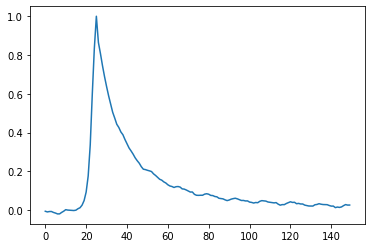

In [331]:
plt.close()
plt.plot(fl)
plt.show()

In [329]:
gp_table.to_csv('./crab_gp_kaz_10_2010-2019_calib_dina_final.csv', sep='\t', header=True, index=False)